<a href="https://colab.research.google.com/github/tangani/Bash-scripts/blob/master/Seoul_Bikes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/InterviewData/SeoulBikeData/SeoulBikeData.csv', encoding='cp1252')

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.shape

(8760, 14)

In [ ]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

* No nulls thus there is no ineed for unputting data

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


In [ ]:
# Checking duplicates
df.duplicated().sum()

0

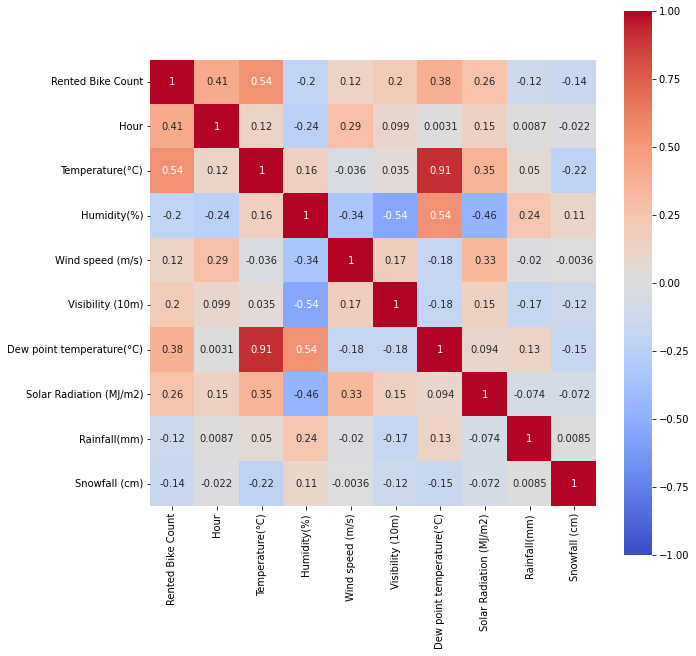

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr("pearson"),
            vmin=-1, vmax=1,
            cmap='coolwarm',
            annot=True, 
            square=True);

* Checking distributions of features

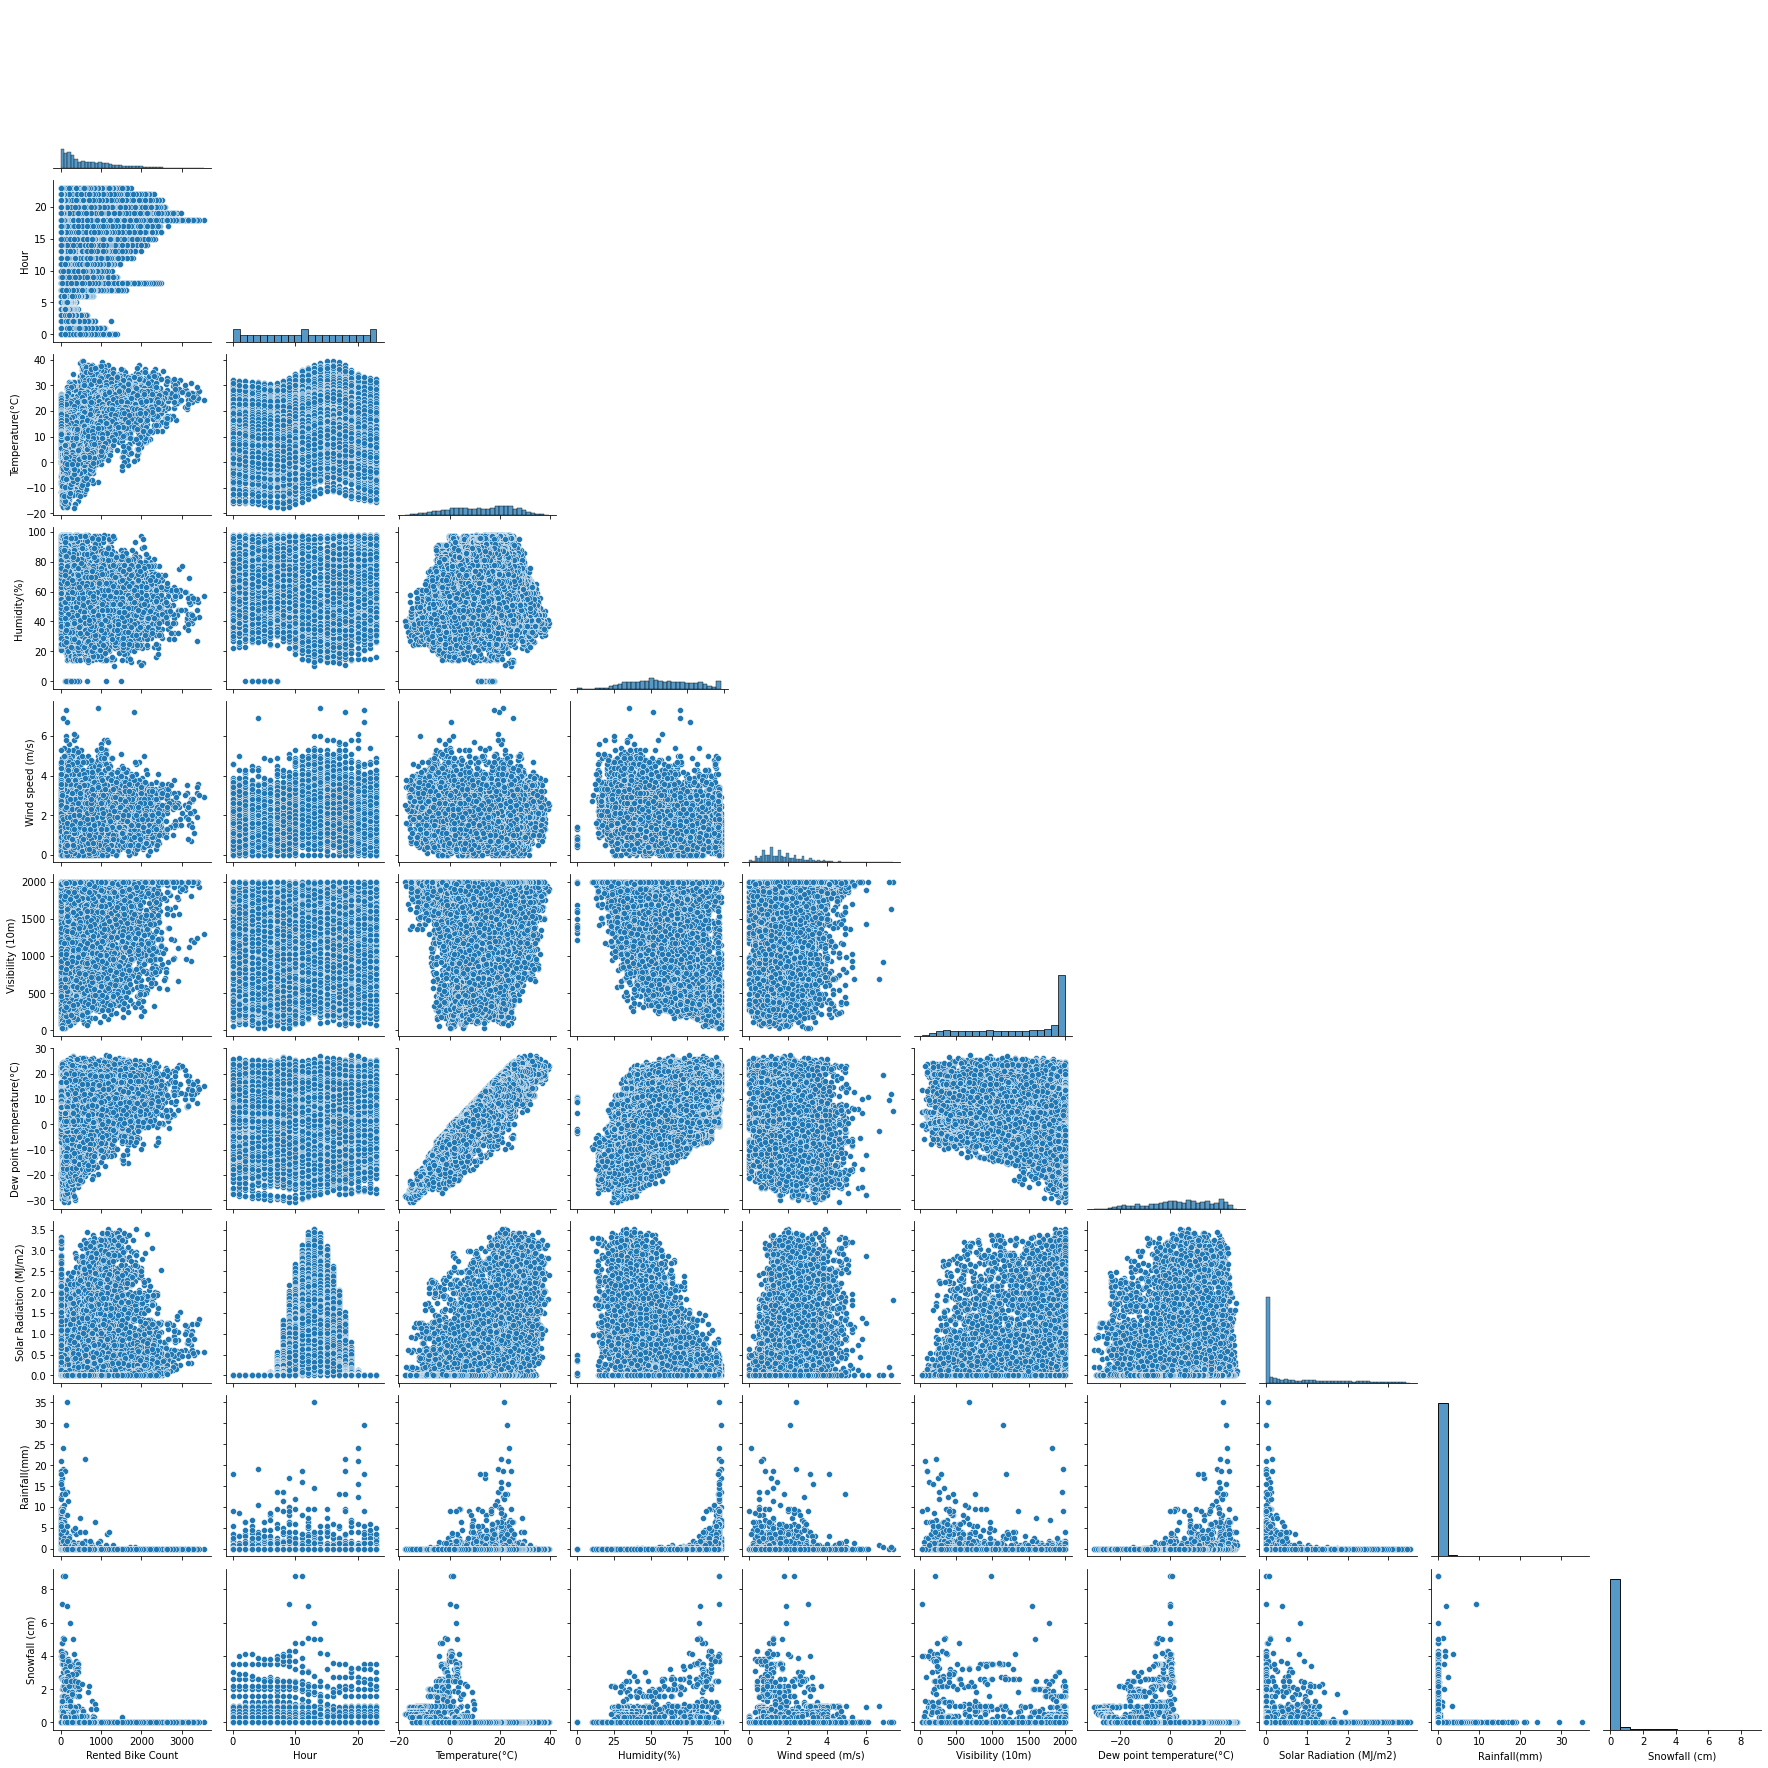

In [ ]:
sns.pairplot(df, corner=True)

* Very high correlation between **'Dew point temperature(°C)'** and **'Temperature'**  drop **'Temperature(°C)'**

In [ ]:
df.drop(['Dew point temperature(°C)'],axis=1, inplace=True)

## Feature engineering

### 1. Create and Extract Date features

In [ ]:
def extract_date_features(dataframe):
    """
    Get a dataframe with a string for Date and convert it to a datetime and then
    extract the year, month, date, and convert the Hour column which is an 
    integer into a categorical variable.
    """
    dataframe['Date'] = pd.to_datetime(dataframe['Date'],format="%d/%m/%Y")
    dataframe['day_night'] = dataframe['Hour'].apply(lambda x : 'Night' if (x >20 or x<5) else( 'Day'))
    dataframe['day_of_week'] =  dataframe["Date"].dt.dayofweek
    dataframe['Month'] = dataframe['Date'].dt.month
    dataframe["year"] = dataframe['Date'].map(lambda x: x.year).astype("object")
    dataframe.drop(columns=['Date'],inplace=True)
    return dataframe

In [ ]:
df = extract_date_features(df)

In [ ]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,day_night,day_of_week,Month,year
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,4,12,2017
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,4,12,2017
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,4,12,2017
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,4,12,2017
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,4,12,2017


In [ ]:
def cosine_features(column):
    max_value = column.max()
    sin_values = [math.sin((2*math.pi*x)/max_value) for x in list(column)]
    cos_values = [math.cos((2*math.pi*x)/max_value) for x in list(column)]
    return sin_values, cos_values

* Date columnsto be engineered: 
> year <br>
> Month <br>
> day_of_week <br>
> Hour <br>


In [ ]:
cyclic_columns = ['year', 'Month', 'day_of_week', 'Hour']

for col in cyclic_columns:
    df[f'{col}_sin_values'], df[f'{col}_cos_values'] = cosine_features(df[col])
    if col == 'Hour':
        continue
    df.drop(col, axis=1, inplace=True)
    # df.drop(['Dew point temperature(°C)'],axis=1, inplace=True)

In [ ]:
df.head().T

,0,1,2,3,4
Rented Bike Count,254,204,173,107,78
Hour,0,1,2,3,4
Temperature(°C),-5.2,-5.5,-6.0,-6.2,-6.0
Humidity(%),37,38,39,40,36
Wind speed (m/s),2.2,0.8,1.0,0.9,2.3
Visibility (10m),2000,2000,2000,2000,2000
Solar Radiation (MJ/m2),0.0,0.0,0.0,0.0,0.0
Rainfall(mm),0.0,0.0,0.0,0.0,0.0
Snowfall (cm),0.0,0.0,0.0,0.0,0.0
Seasons,Winter,Winter,Winter,Winter,Winter


In [ ]:
# Seperate categorical and numerical features
df['Hour'] = df['Hour'].astype('object')
numeric_features = df.select_dtypes(exclude='object')
categorical_features = df.select_dtypes(include='object')

In [ ]:
numeric_features.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),year_sin_values,year_cos_values,Month_sin_values,Month_cos_values,day_of_week_sin_values,day_of_week_cos_values,Hour_sin_values,Hour_cos_values
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,-0.003114,0.999995,-2.449294e-16,1.0,-0.866025,-0.5,0.000000,1.000000
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,-0.003114,0.999995,-2.449294e-16,1.0,-0.866025,-0.5,0.269797,0.962917
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,-0.003114,0.999995,-2.449294e-16,1.0,-0.866025,-0.5,0.519584,0.854419
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,-0.003114,0.999995,-2.449294e-16,1.0,-0.866025,-0.5,0.730836,0.682553
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,-0.003114,0.999995,-2.449294e-16,1.0,-0.866025,-0.5,0.887885,0.460065


In [ ]:
categorical_features.head()

,Hour,Seasons,Holiday,Functioning Day,day_night
0,0,Winter,No Holiday,Yes,Night
1,1,Winter,No Holiday,Yes,Night
2,2,Winter,No Holiday,Yes,Night
3,3,Winter,No Holiday,Yes,Night
4,4,Winter,No Holiday,Yes,Night


In [ ]:
# Get Categorigal Value Count
for i in categorical_features.columns:
    print("\n ")
    print(f'\033[1m {i} \033[0m')
    print(df[i].value_counts())


 
 Hour 
0     365
1     365
22    365
21    365
20    365
19    365
18    365
17    365
16    365
15    365
14    365
13    365
12    365
11    365
10    365
9     365
8     365
7     365
6     365
5     365
4     365
3     365
2     365
23    365
Name: Hour, dtype: int64

 
 Seasons 
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

 
 Holiday 
No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

 
 Functioning Day 
Yes    8465
No      295
Name: Functioning Day, dtype: int64

 
 day_night 
Day      5840
Night    2920
Name: day_night, dtype: int64


ValueError: ignored

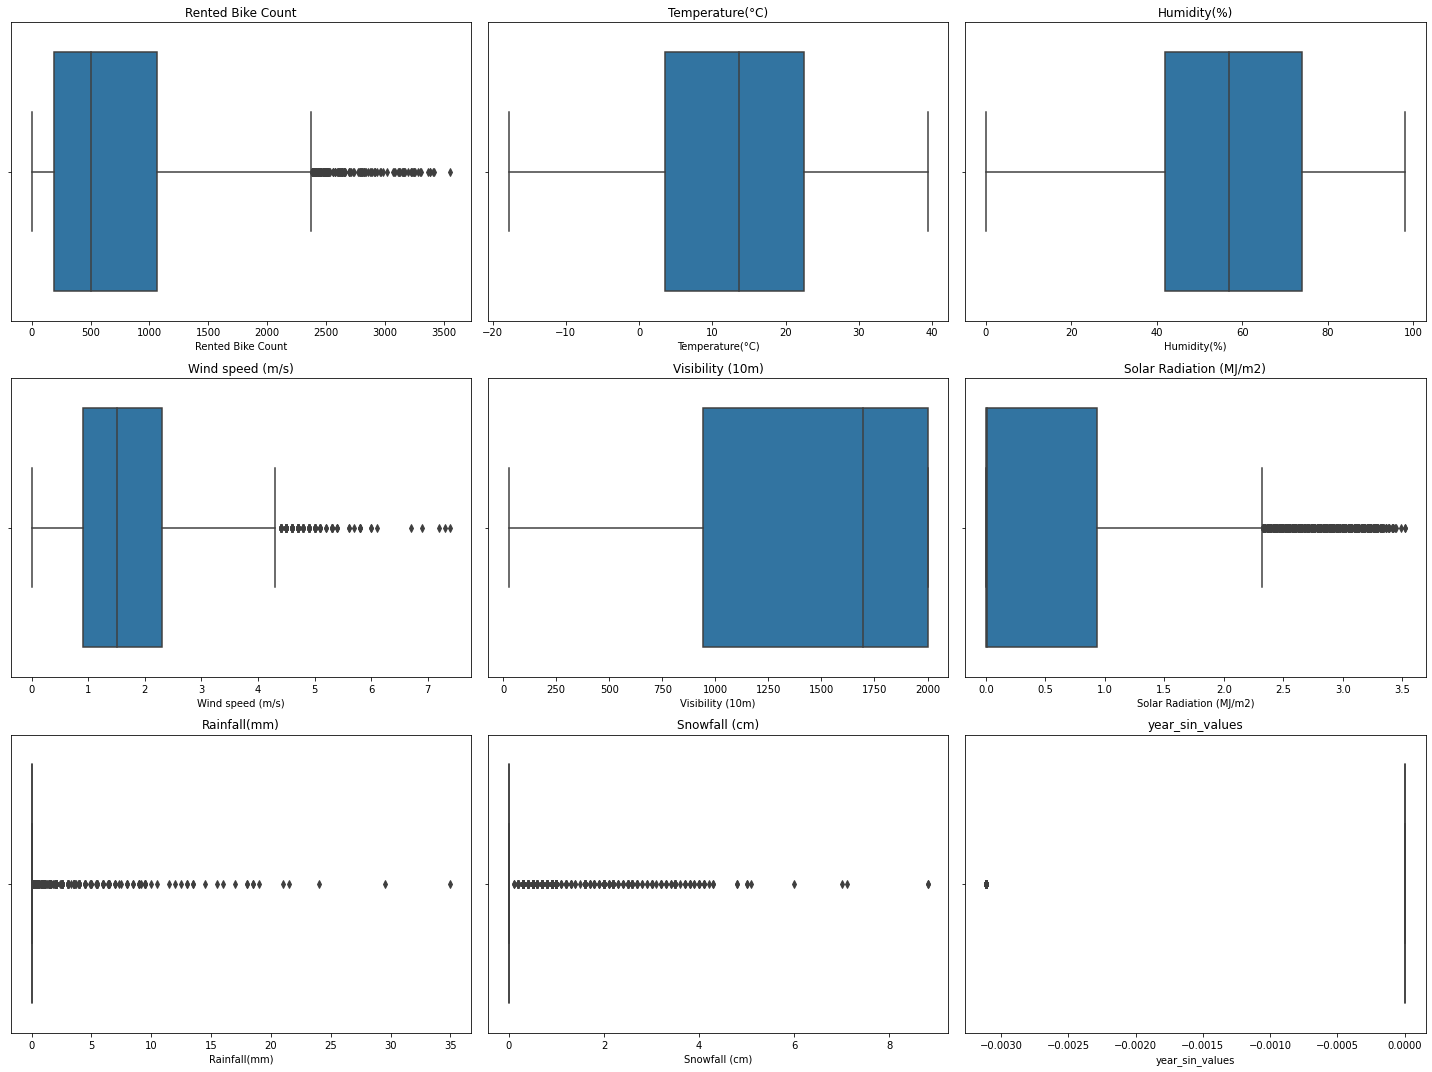

In [ ]:
# Investigating outliers
counter = 1
plt.figure(figsize=(20,15))

for i in numeric_features.columns:
  plt.subplot(3,3,counter)
  counter = counter + 1
  sns.boxplot(df[i])
  plt.title(i)
  plt.tight_layout()

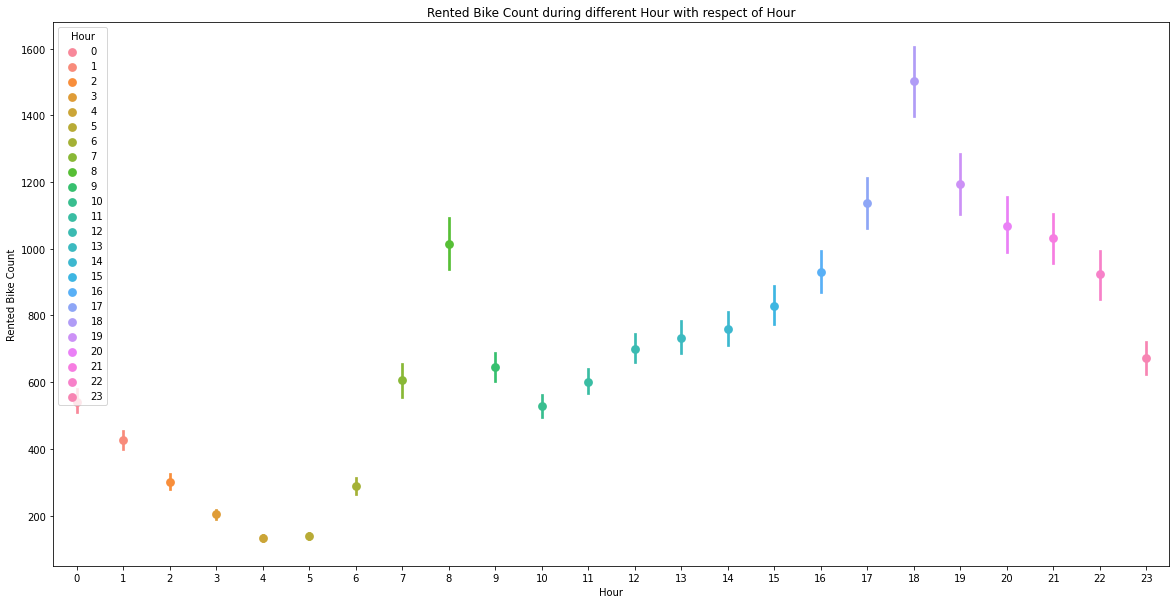

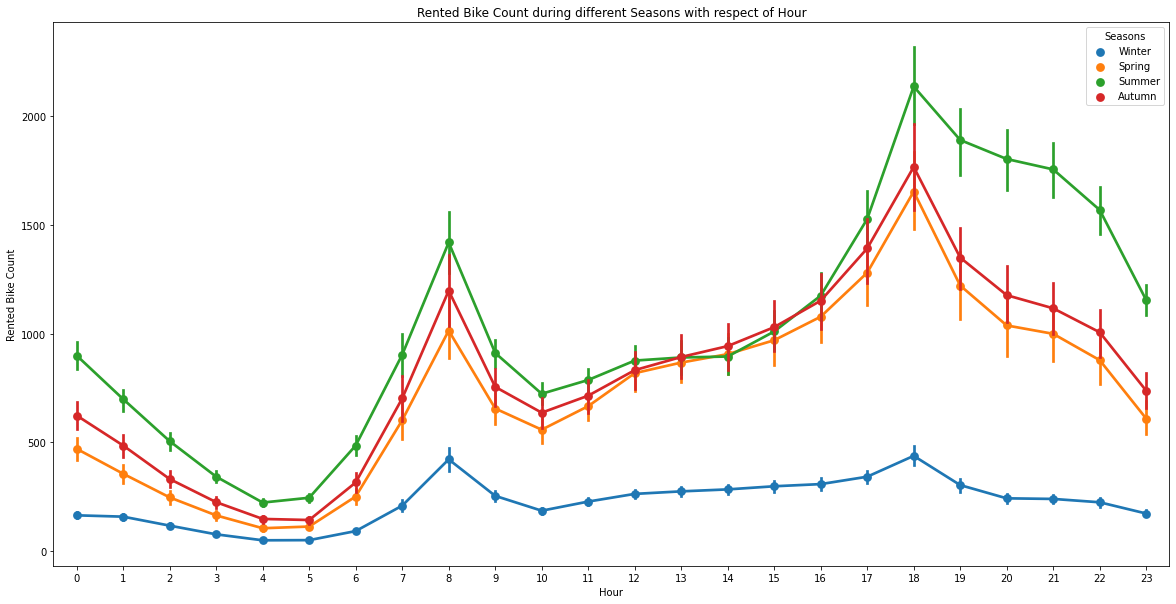

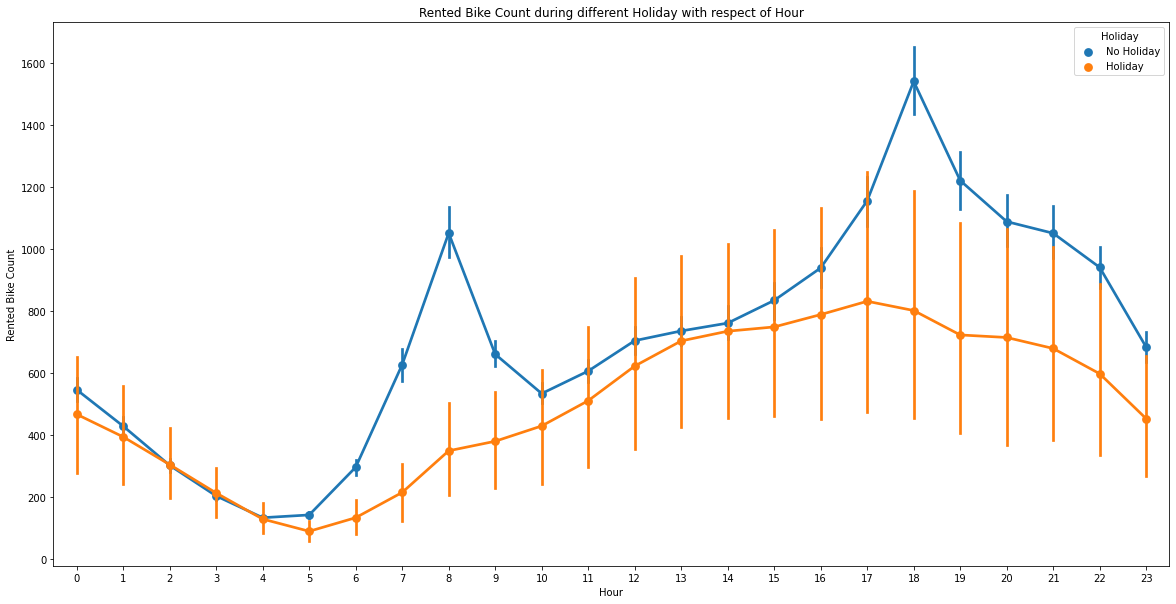

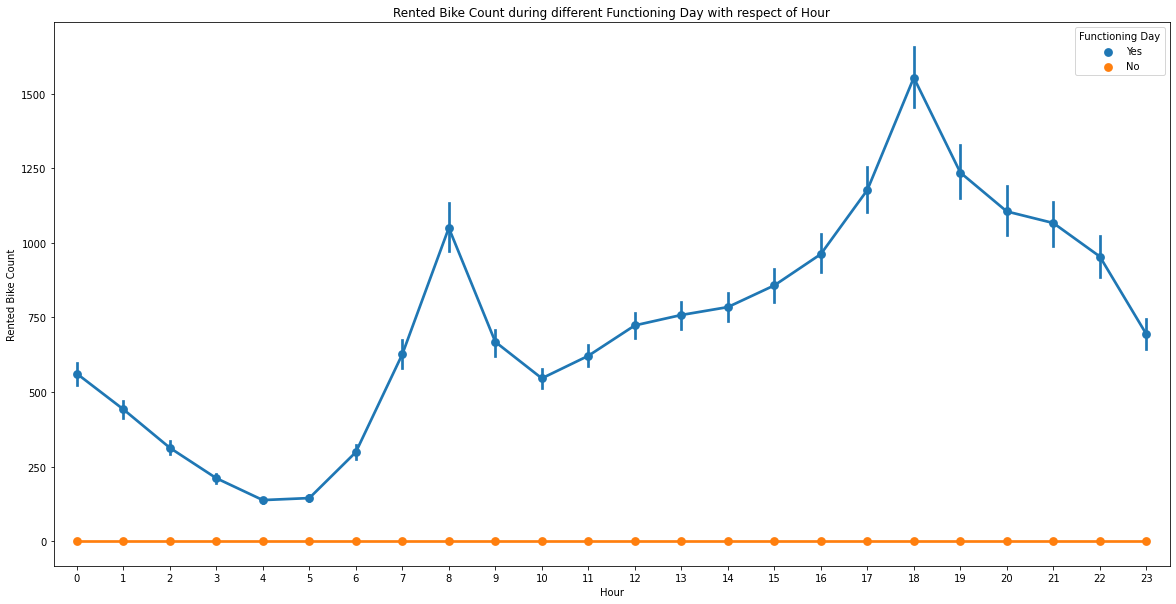

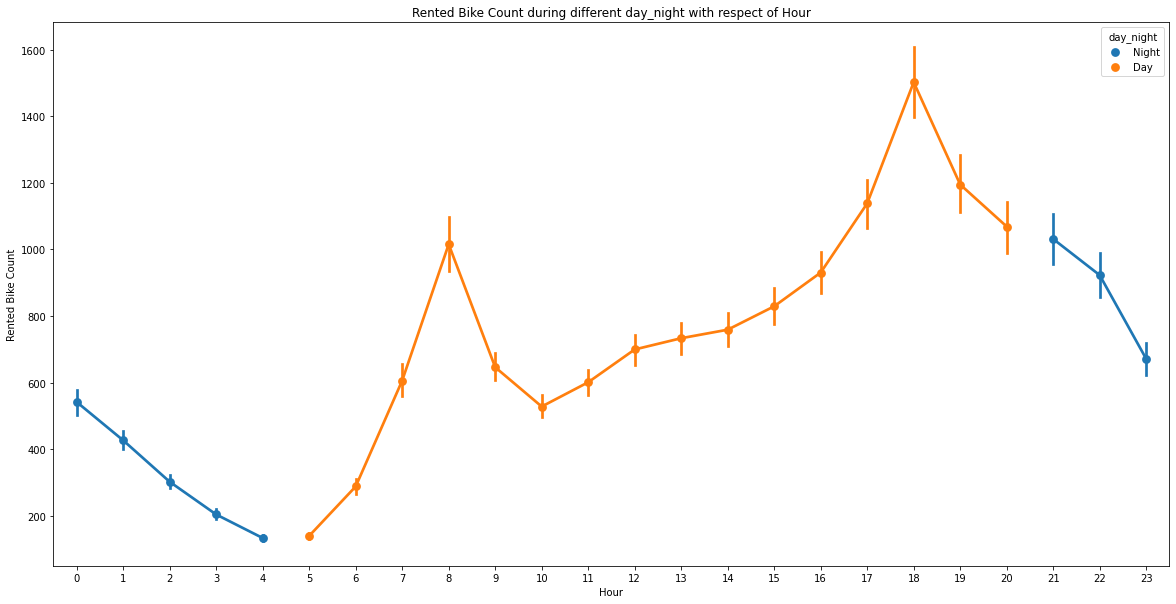

In [ ]:
# Comparing Catagorical features in each column excpet
for i in categorical_features.columns:
    plt.figure(figsize=(20,10))
    sns.pointplot(x=df["Hour"],y = df['Rented Bike Count'], hue = df[i])
    plt.title(f"Rented Bike Count during different {i} with respect of Hour")
    plt.show()

* There is a need to drop the **day_night** column as it masks data already in the **Hour** column

* The rest of the categorical columns will be one hot encoded as they do not have a lt of variables to cause the curse of dimensionality

* Finally the Hour column was kept for the sole purporse of plotting these graphs

In [ ]:
df.drop(columns=['Hour', 'day_night'], inplace=True)

In [ ]:
df.head().T

,0,1,2,3,4
Rented Bike Count,2.540000e+02,2.040000e+02,1.730000e+02,1.070000e+02,7.800000e+01
Temperature(°C),-5.200000e+00,-5.500000e+00,-6.000000e+00,-6.200000e+00,-6.000000e+00
Humidity(%),3.700000e+01,3.800000e+01,3.900000e+01,4.000000e+01,3.600000e+01
Wind speed (m/s),2.200000e+00,8.000000e-01,1.000000e+00,9.000000e-01,2.300000e+00
Visibility (10m),2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03
Solar Radiation (MJ/m2),0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Rainfall(mm),0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Snowfall (cm),0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
year_sin_values,-3.113565e-03,-3.113565e-03,-3.113565e-03,-3.113565e-03,-3.113565e-03
year_cos_values,9.999952e-01,9.999952e-01,9.999952e-01,9.999952e-01,9.999952e-01


### Checking distributions

<Figure size 1440x1080 with 0 Axes>

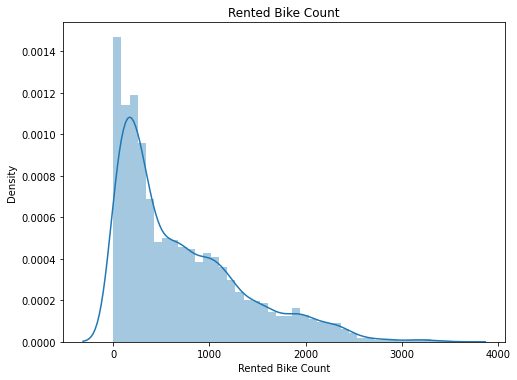

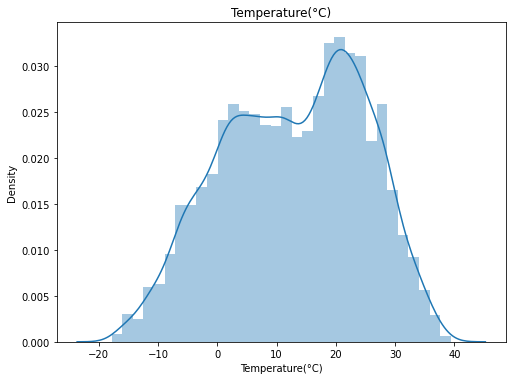

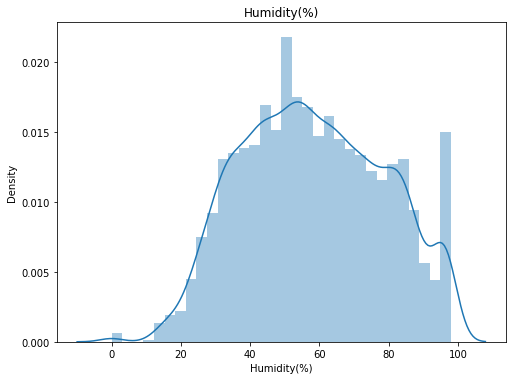

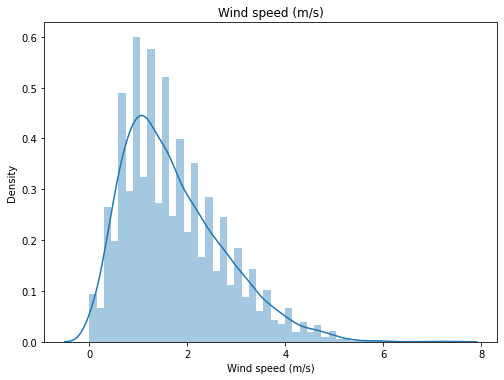

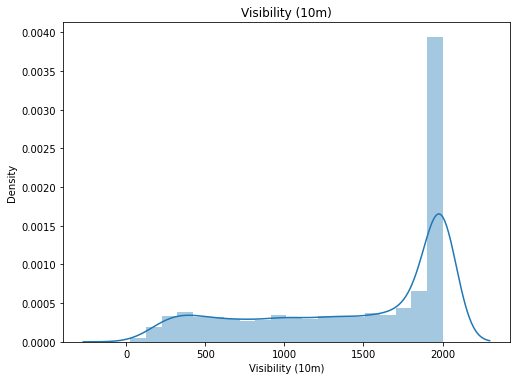

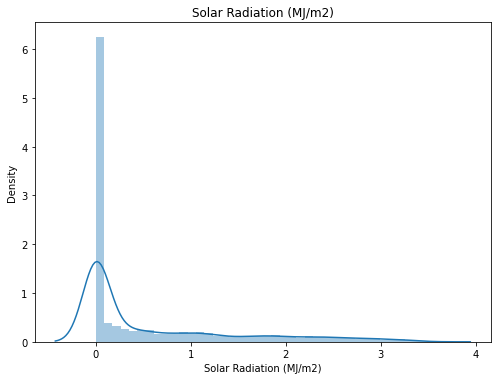

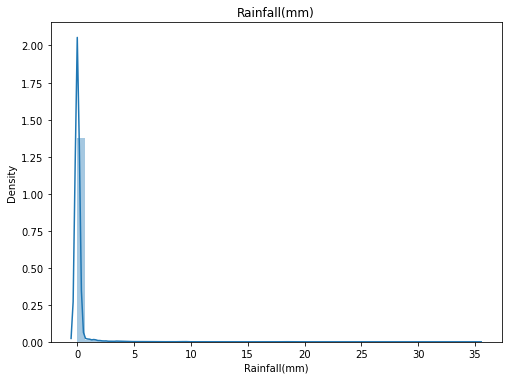

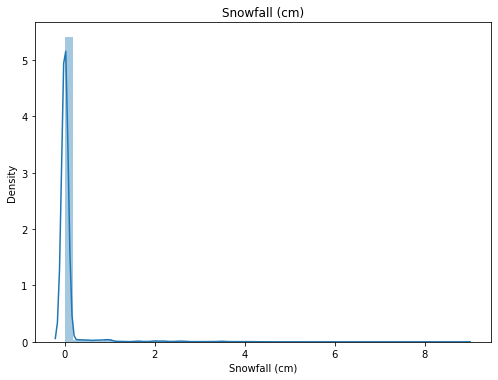

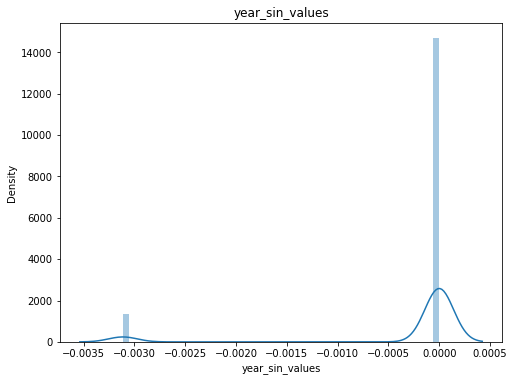

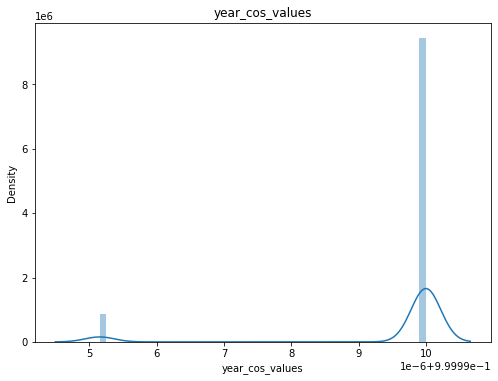

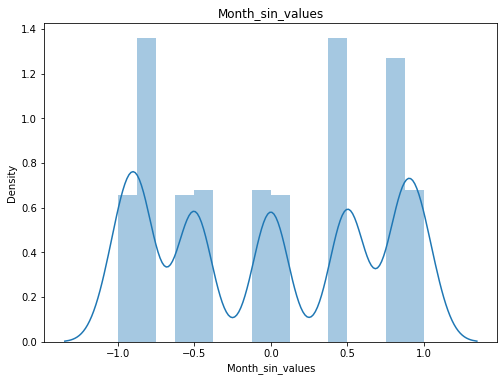

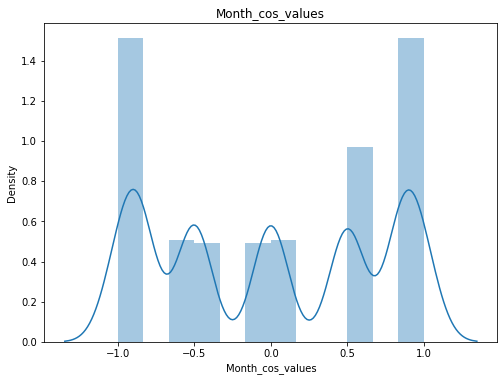

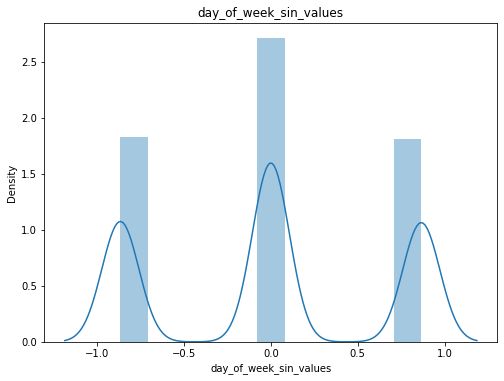

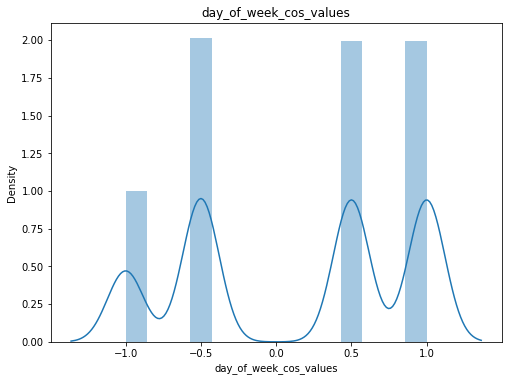

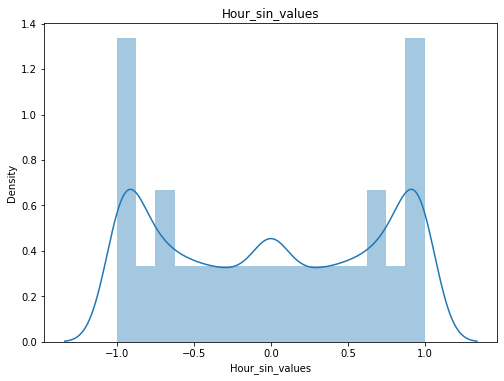

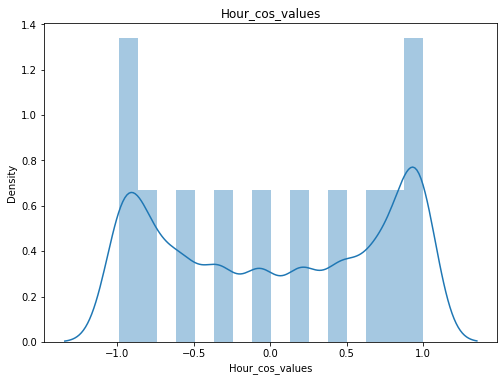

In [ ]:
# Checking data distribution
counter = 1
plt.figure(figsize=(20,15))
for i in numeric_features.columns:
    plt.figure(figsize=(20,15))
    plt.subplot(3,3,counter)
    cunter = counter + 1
    sns.distplot(df[i])
    plt.title(i)
    plt.tight_layout()
    plt.show()

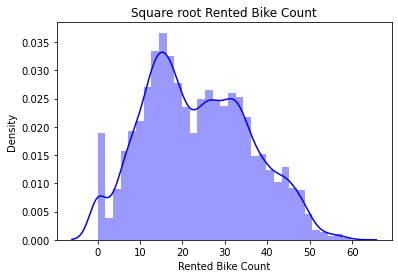

In [ ]:
# fig,axes = plt.subplots(0,1,figsize=(20,5))
square_root = sns.distplot(np.sqrt(df['Rented Bike Count']), color='blue').set_title("Square root Rented Bike Count")

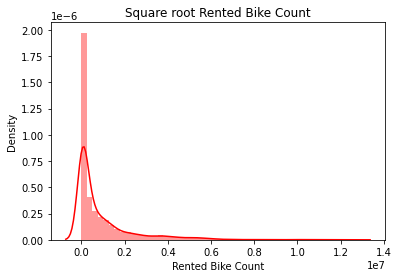

In [ ]:
squared_root = sns.distplot((df['Rented Bike Count']**2), color='red').set_title("Square root Rented Bike Count")

* Square root is better as it gives a Gaussian distribution to the target

In [ ]:
df.head().T

,0,1,2,3,4
Rented Bike Count,2.540000e+02,2.040000e+02,1.730000e+02,1.070000e+02,7.800000e+01
Temperature(°C),-5.200000e+00,-5.500000e+00,-6.000000e+00,-6.200000e+00,-6.000000e+00
Humidity(%),3.700000e+01,3.800000e+01,3.900000e+01,4.000000e+01,3.600000e+01
Wind speed (m/s),2.200000e+00,8.000000e-01,1.000000e+00,9.000000e-01,2.300000e+00
Visibility (10m),2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03
Solar Radiation (MJ/m2),0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Rainfall(mm),0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Snowfall (cm),0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
year_sin_values,-3.113565e-03,-3.113565e-03,-3.113565e-03,-3.113565e-03,-3.113565e-03
year_cos_values,9.999952e-01,9.999952e-01,9.999952e-01,9.999952e-01,9.999952e-01


## Modelling

In [ ]:
from scipy.stats import uniform, randint
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split


from sklearn.preprocessing import PolynomialFeatures
import xgboost as xgb

In [ ]:
import time
model_performance = pd.DataFrame(columns=['R2','RMSE', 'time to train','time to predict','total time'])

In [ ]:
x = df.drop(['Rented Bike Count'],axis=1)
y = np.sqrt(df['Rented Bike Count'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

In [ ]:
print("X_Train", X_train.shape)
print("X_Test", X_test.shape)
print("y_train_", y_train.shape)
print("y_test", y_test.shape)

X_Train (7008, 20)
X_Test (1752, 20)
y_train_ (7008,)
y_test (1752,)


### LinearRegression

In [ ]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)


LinearRegression()

In [ ]:
linear_regression_prediction = linear_regression.predict(X_test)
linear_regression_metrics = metrics.r2_score(y_test, linear_regression_prediction)
linear_regression_metrics

0.6315521705583567

### DECISION TREES REGRESSION

In [ ]:
decision_tree_regressor = DecisionTreeRegressor(min_samples_leaf=21)
start = time.time()
decision_tree_regressor.fit(X_train, y_train)
decision_tree_regressor_predictions = decision_tree_regressor.predict(X_test)
decision_tree_regressor_r2 = metrics.r2_score(y_test, decision_tree_regressor_predictions)
decision_tree_regressor_mse = mean_squared_error(y_test, decision_tree_regressor_predictions)
print('decision_tree_regressor_r2:', decision_tree_regressor_r2)
print('decision_tree_regressor_mse:', decision_tree_regressor_mse)

decision_tree_regressor_r2: 0.8599463673529237
decision_tree_regressor_mse: 21.55657763772296


### RANDOM FOREST REGRESSION

In [ ]:
random_forest_regressor = RandomForestRegressor(n_jobs=-1, n_estimators=500,
                                                min_samples_leaf=2)
random_forest_regressor.fit(X_train,y_train)
random_forest_regressor_predictions = random_forest_regressor.predict(X_test)
random_forest_regressor_r2 = metrics.r2_score(y_test, random_forest_regressor_predictions)
random_forest_regressor_mse = mean_squared_error(y_test, random_forest_regressor_predictions)
print('random_forest_regressor_r2:', random_forest_regressor_r2)
print('random_forest_regressor_mse', random_forest_regressor_mse)


random_forest_regressor_r2: 0.916191855183443
random_forest_regressor_mse 12.89946391440032


### Grid Search CV

In [ ]:
# Grid Search
rfg = RandomForestRegressor()
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(rfg, param_grid = grid_values, scoring = 'recall')
grid_clf_acc.fit(X_train, y_train)

# Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(X_test)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))

ValueError: ignored